In [1]:
!pip install pywaterflood

In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from pywaterflood import CRM

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
def rmse(test,pred):
    rmse = np.sqrt(((test-pred)**2/len(test)).sum())
    return rmse

## Streak case

In [59]:
prod_streak = pd.read_excel('./Streak/Production_streak.xlsx')
inj_streak = pd.read_excel('./Streak/Injection_streak.xlsx')

In [60]:
prod = pd.concat((prod_streak,inj_streak),axis=1)

In [61]:
dates = prod_streak['Date'].values
dt = np.hstack(([1.], pd.to_timedelta(dates[1:] - dates[:-1]).days/30))
dt_cum = dt.cumsum()

In [62]:
dt_cum = dt_cum  - 1/30

In [63]:
train_size=60
prod = pd.concat((prod_streak,inj_streak),axis=1)
injection_rates_train = prod.loc[:, ['I1','I2','I3','I4','I5']].values[1:train_size]
production_rates_train = prod.loc[:, ['P1', 'P2', 'P3', 'P4']].values[1:train_size]


injection_rates_test = prod.loc[:, ['I1','I2','I3','I4','I5']].values[train_size:]
production_rates_test= prod.loc[:, ['P1', 'P2', 'P3', 'P4']].values[train_size:]

dates_train = prod['Date'].values[1:train_size,0]
dates_test = prod['Date'].values[train_size:,0]

In [64]:
dt_train = np.hstack(([1.], pd.to_timedelta(dates_train[1:] - dates_train[:-1]).days/30))
dt_cum = dt_train.cumsum()
dt_cum_train = dt_cum  - 1/30

dt_test = np.hstack(([1.], pd.to_timedelta(dates_test[1:] - dates_test[:-1]).days/30))
dt_cum = dt_test.cumsum()
dt_cum_test = dt_cum  - 1/30

In [65]:
crm = CRM(tau_selection='per-pair', constraints='up-to one')
crm.fit(production_rates_train, injection_rates_train, dt_cum_train)

In [66]:
pred = crm.predict(injection=injection_rates_test,time=dt_cum_test)

In [67]:
print('rmse',rmse(production_rates_test[:,0],pred[:,0]))
print('MAE',mean_absolute_error(production_rates_test[:,0],pred[:,0]))

rmse 292.9476524561581
MAE 129.3411998425363


In [68]:
print('rmse',rmse(production_rates_test[:,1],pred[:,1]))
print('MAE',mean_absolute_error(production_rates_test[:,1],pred[:,1]))

rmse 21.694396086612123
MAE 20.831496489965517


In [69]:
print('rmse',rmse(production_rates_test[:,2],pred[:,2]))
print('MAE',mean_absolute_error(production_rates_test[:,2],pred[:,2]))

rmse 74.65116521413944
MAE 60.338389910930374


In [70]:
print('rmse',rmse(production_rates_test[:,3],pred[:,3]))
print('MAE',mean_absolute_error(production_rates_test[:,3],pred[:,3]))

rmse 165.9389718961873
MAE 66.25830721312697


In [18]:
rmse(production_rates_test,pred)

345.53945181835485

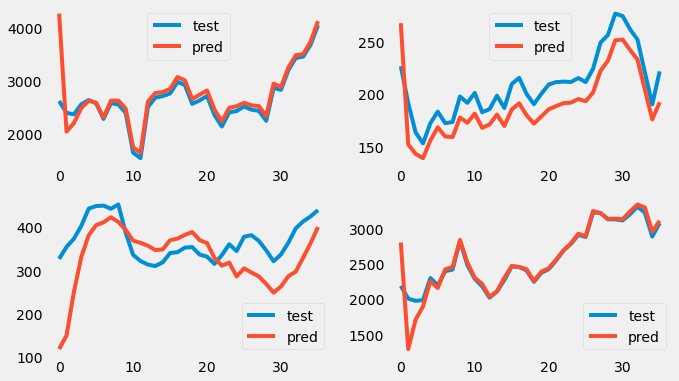

In [19]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(production_rates_test[:,0],label='test')
ax[0,0].plot(pred[:,0],label='pred')
ax[0,0].grid()
ax[0,0].legend()


ax[0,1].plot(production_rates_test[:,1],label='test')
ax[0,1].plot(pred[:,1],label='pred')
ax[0,1].grid()
ax[0,1].legend()


ax[1,0].plot(production_rates_test[:,2],label='test')
ax[1,0].plot(pred[:,2],label='pred')
ax[1,0].grid()
ax[1,0].legend()


ax[1,1].plot(production_rates_test[:,3],label='test')
ax[1,1].plot(pred[:,3],label='pred')
ax[1,1].grid()
ax[1,1].legend()


## Non streak case

In [75]:
prod_nonstreak = pd.read_excel('./Non_Streak/Production_nonstreak.xlsx')
inj_nonstreak = pd.read_excel('./Non_Streak/Injection_nonstreak.xlsx')

In [76]:
prod = pd.concat((prod_nonstreak,inj_nonstreak),axis=1)

In [77]:
injection_rates_train = prod.loc[:, ['I1','I2','I3','I4','I5']].values[1:train_size]
production_rates_train = prod.loc[:, ['P1', 'P2', 'P3', 'P4']].values[1:train_size]


injection_rates_test = prod.loc[:, ['I1','I2','I3','I4','I5']].values[train_size:]
production_rates_test= prod.loc[:, ['P1', 'P2', 'P3', 'P4']].values[train_size:]

dates_train = prod['Time [days]'].values[1:train_size,0]
dates_test = prod['Time [days]'].values[train_size:,0]



#dt_train = np.hstack(([1.], pd.to_timedelta(dates_train[1:] - dates_train[:-1]).days/30))
#dt_cum = dt_train.cumsum()
#dt_cum_train = dt_cum  - 1/30

#dt_test = np.hstack(([1.], pd.to_timedelta(dates_test[1:] - dates_test[:-1]).days/30))
#dt_cum = dt_test.cumsum()
#dt_cum_test = dt_cum  - 1/30

In [78]:
crm = CRM(tau_selection='per-pair', constraints='up-to one')
crm.fit(production_rates_train, injection_rates_train, dates_train)

In [79]:
pred = crm.predict(injection=injection_rates_test,time=dates_test)

In [80]:
from sklearn.metrics import mean_absolute_error

In [81]:
print('rmse',rmse(production_rates_test[:,0],pred[:,0]))
print('MAE',mean_absolute_error(production_rates_test[:,0],pred[:,0]))

rmse 689.7381594894255
MAE 506.0965554485655


In [82]:
print('rmse',rmse(production_rates_test[:,1],pred[:,1]))
print('wmape',mean_absolute_error(production_rates_test[:,1],pred[:,1]))

rmse 685.7029909935773
wmape 567.9393395624345


In [83]:
print('rmse',rmse(production_rates_test[:,2],pred[:,2]))
print('wmape',mean_absolute_error(production_rates_test[:,2],pred[:,2]))

rmse 623.2525909939668
wmape 486.9420186032416


In [84]:
print('rmse',rmse(production_rates_test[:,3],pred[:,3]))
print('wmape',mean_absolute_error(production_rates_test[:,3],pred[:,3]))

rmse 648.7599060146327
wmape 550.7441098205187


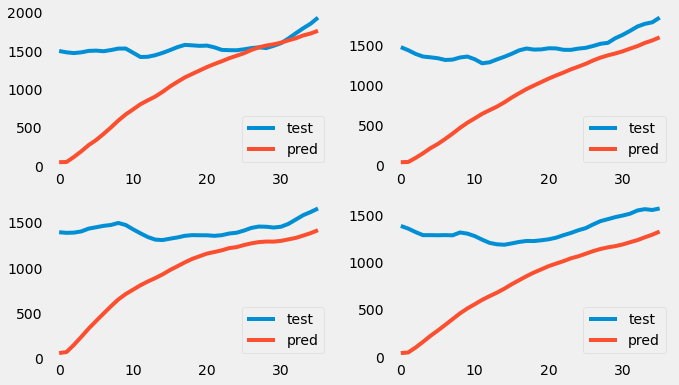

In [58]:
fig,ax = plt.subplots(2,2, figsize=(10,6))


ax[0,0].plot(production_rates_test[:,0],label='test')
ax[0,0].plot(pred[:,0],label='pred')
ax[0,0].grid()
ax[0,0].legend()


ax[0,1].plot(production_rates_test[:,1],label='test')
ax[0,1].plot(pred[:,1],label='pred')
ax[0,1].grid()
ax[0,1].legend()


ax[1,0].plot(production_rates_test[:,2],label='test')
ax[1,0].plot(pred[:,2],label='pred')
ax[1,0].grid()
ax[1,0].legend()


ax[1,1].plot(production_rates_test[:,3],label='test')
ax[1,1].plot(pred[:,3],label='pred')
ax[1,1].grid()
ax[1,1].legend()


# model description

In [190]:
def model_function(train_size,params):
    production_rates = pd.concat((prod_streak,inj_streak),axis=1)
    injection_rates = prod.loc[:, ['I1','I2','I3','I4']].values[:train_size]
    production_rates = prod.loc[:, ['P1', 'P2', 'P3', 'P4']].values[:train_size]
    dates = prod['Date'].values[:train_size][0]
    
    dt = np.hstack(([1.], pd.to_timedelta(dates[1:] - dates[:-1]).days/30))
    dt_cum = dt.cumsum()
    dt_cum = dt_cum  - 1/30
    
    res = np.zeros_like(production_rates)
    
    lambda_pj,lambda_ij,tau_pj,tau_j = np.array(params)[0:4],np.array(params)[4:8],np.array(params)[8:12],np.array(params)[12:16]
    
    def q_inj_influence(lmbds, taus, inj, time):
        infl = 0
        for i in range(inj.shape[1]):
            sum = 0.0
            n = inj.shape[0]
            for m in range(n):
                if m == 0:
                    d_t_m = 0
                else:
                    d_t_m = time[m] - time[m-1]
                sum += ((1 - np.exp(-(d_t_m) / taus)) * np.exp(-(time[n - 1] - time[m]) / taus) * inj[i,m])
            sum *= lmbds
            infl += sum
        return infl

    for j in range(production_rates.shape[1]):
        for n in range(production_rates.shape[0]):
            res[n,j] += lambda_pj[j] * production_rates[n,j] * np.exp(-(dt_cum[n] - dt_cum[0]) / tau_pj[j])
           
            res[n, j] += q_inj_influence(lambda_ij[j], tau_j[j],
                                         injection_rates[:n+1], dt_cum[:n+1])

    return res

In [191]:

def obj_func(params,targets):

    rmse =np.sqrt(((targets - model_function(train_size,params))**2).sum()/len(targets))
    return np.array(rmse)

In [192]:
params = np.array(([.2,.2,.2,.2],
          [.2,.2,.2,.2],
          [10,3,3,3],
          [10,10,10,10])).reshape(-1)

In [193]:
lambda_1_constr = np.zeros_like(params)
lambda_1_constr[:4]+=1
constr1 = scipy.optimize.LinearConstraint(lambda_1_constr, 1, 1)
lambda_2_constr = np.zeros_like(params)
lambda_2_constr[4:8]+=1
constr2 = scipy.optimize.LinearConstraint(lambda_2_constr, 1, 1)

In [173]:
crm = CRM(tau_selection='per-pair', constraints='up-to one')
crm.fit(production_rates_train, injection_rates_train, dt_cum_train)
#q_hat = crm.predict()
#residuals = crm.residual()

In [195]:
pred = crm.predict(injection=injection_rates_test,time=dt_cum_test)

In [197]:
residuals = crm.residual(production = production_rates_test,injection=injection_rates_test,time=dt_cum_test)


In [198]:
residuals.sum()

-2491.1534533251483

In [200]:
r2_score(production_rates_test,pred)

0.7180160113227805

In [176]:
train_size = 60
result = scipy.optimize.minimize(obj_func, params, constraints = [constr2], args=production_rates[:train_size],
                                  method='SLSQP', options = {'maxiter': 100})


result

IndexError: index 1 is out of bounds for axis 0 with size 1